## Import libraries

In [68]:
import os
import matplotlib.pyplot as plt
import json
import os
from statistics import mean, stdev
from pprint import pprint
import numpy as np

## Read json result files

In [69]:
result_base_path = "./store"
folders = os.listdir(result_base_path)
print(len(folders))

100


In [70]:
results_dict = {'Random': {
    'iter_accuracy': [],
    'iter_recall': [],
    'iter_precision': [],
    'iter_f1': []
},
    'ActiveLR': {'iter_accuracy': [],
                 'iter_recall': [],
                 'iter_precision': [],
                 'iter_f1': []}
}
for folder in folders:
    with open(os.path.join(result_base_path, folder, "study_metrics.json"), 'r') as fp:
        study_metrics = json.load(fp)
        for metric_type in ['iter_accuracy', 'iter_recall', 'iter_precision', 'iter_f1']:
            if 'RANDOM' in folder:
                results_dict['Random'][metric_type].append([list(range(1, len(
                    study_metrics[metric_type])+1)), study_metrics['elapsed_time'], study_metrics[metric_type]])
            elif 'ACTIVELR' in folder:
                results_dict['ActiveLR'][metric_type].append([list(range(1, len(
                    study_metrics[metric_type])+1)), study_metrics['elapsed_time'], study_metrics[metric_type]])

# pprint(results_dict)


## Compute Average time and accuracy

In [71]:
'''For Random'''
average_dict = {'Random': {
    'iter_accuracy': [],
    'iter_recall': [],
    'iter_precision': [],
    'iter_f1': []
},
    'ActiveLR': {
    'iter_accuracy': [],
    'iter_recall': [],
    'iter_precision': [],
    'iter_f1': []
}}

for sampling_type in ['Random', 'ActiveLR']:
    for metric_type in ['iter_accuracy', 'iter_recall', 'iter_precision', 'iter_f1']:
        for exp_metrics_lst in zip(*results_dict[sampling_type][metric_type]):
            average_lst = []
            # print(exp_metrics_lst)

            max_len = max(len(exp_metric) for exp_metric in exp_metrics_lst)
            # print(max_len)
            for idx in range(max_len):
                candidate_lst = [exp_metric[idx] for exp_metric in exp_metrics_lst if idx<len(exp_metric) and str(exp_metric[idx])!='nan']
                if candidate_lst:
                    average_lst.append(mean(candidate_lst))
                else:
                    average_lst.append(np.nan)
            average_dict[sampling_type][metric_type].append(average_lst)
        # print(average_dict[sampling_type][metric_type])
# print(average_dict)

In [72]:
# '''For Random'''
# average_dict = {'Random': {
#     'iter_accuracy': [],
#     'iter_recall': [],
#     'iter_precision': [],
#     'iter_f1': []
# },
#     'ActiveLR': {
#     'iter_accuracy': [],
#     'iter_recall': [],
#     'iter_precision': [],
#     'iter_f1': []
# }
# }
# for sampling_type in ['Random', 'ActiveLR']:
#     for metric_type in ['iter_accuracy', 'iter_recall', 'iter_precision', 'iter_f1']:
#         for val in zip(*results_dict[sampling_type][metric_type]):
#             idx = 0
#             average_vals = []
#             candidate_vals = []
#             end = False
#             while not end:
#                 end = True
#                 for exp_lst in val:
#                     if idx < len(exp_lst) and (str(exp_lst[idx]) != 'nan'):
#                         '''If any found then end is false'''
#                         candidate_vals.append(exp_lst[idx])
#                         end = False
#                 else:
#                     idx += 1
#                     # print(mean(candidate_vals), candidate_vals)
#                     print(candidate_vals)
#                     average_vals.append(mean(candidate_vals))

#             average_dict[sampling_type][metric_type].append(average_vals)


In [73]:
# pprint(average_dict)

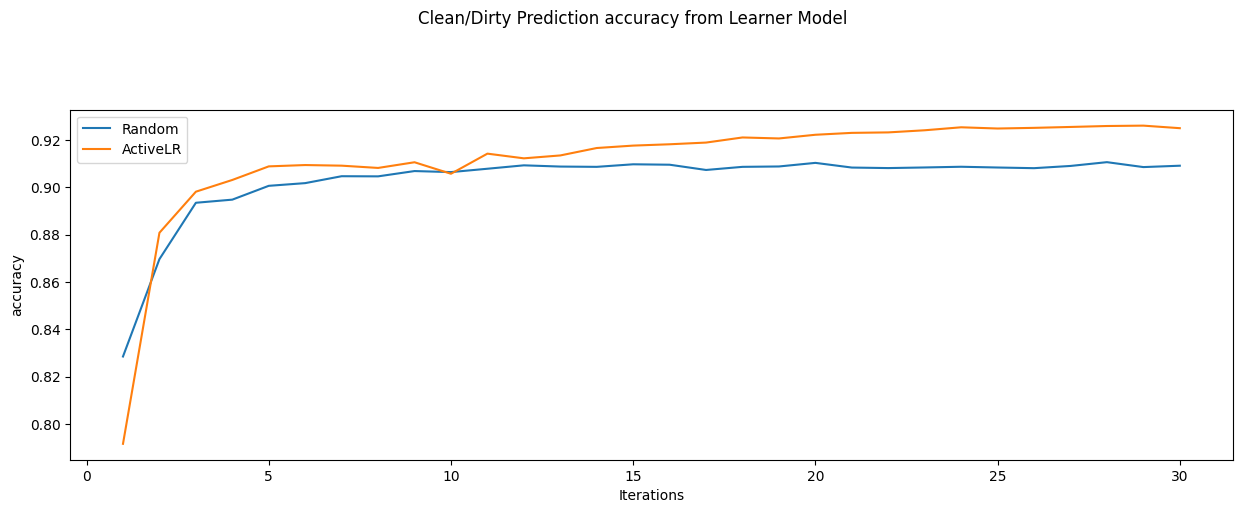

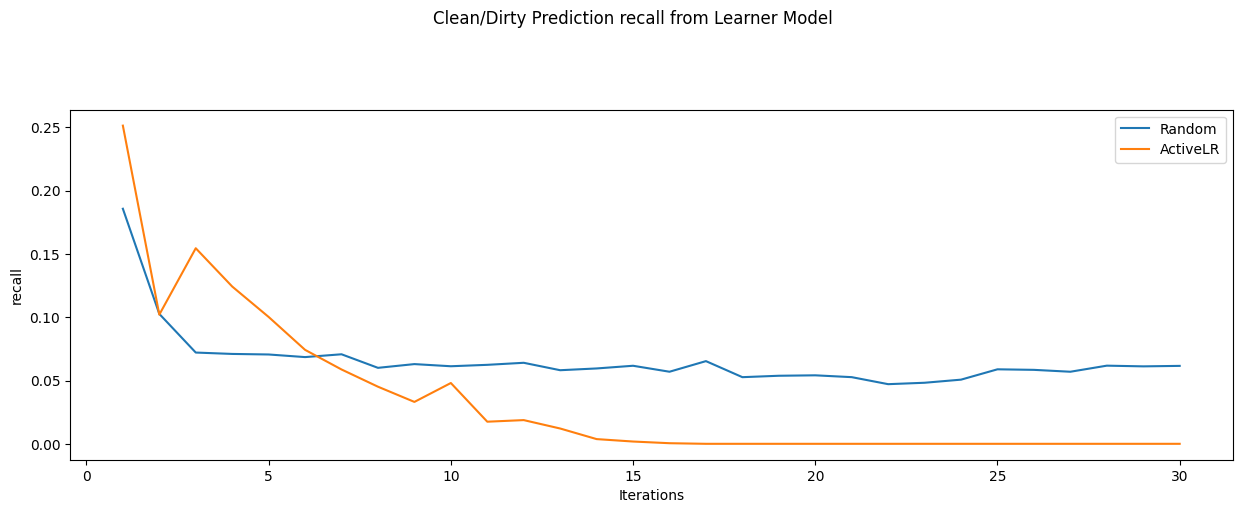

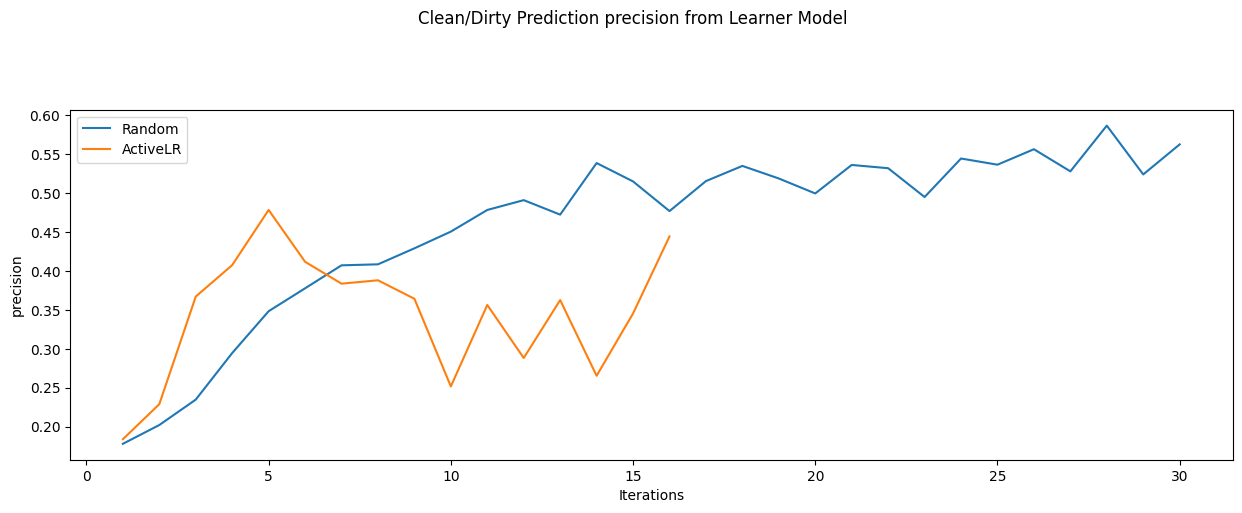

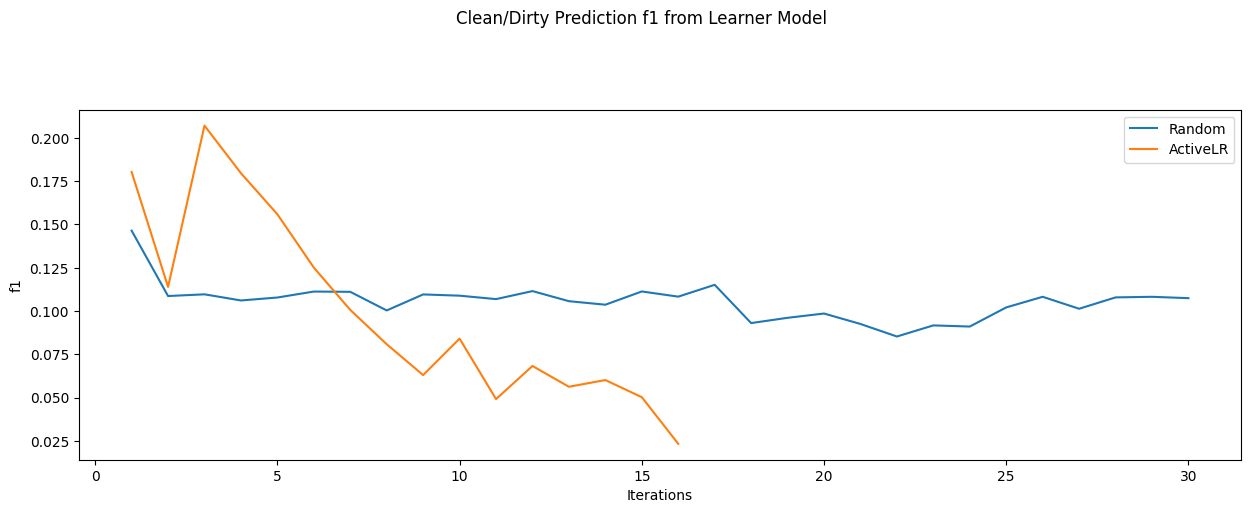

In [74]:
for metric in ['accuracy', 'recall', 'precision', 'f1']:
    plt.figure(figsize=(15,10))
    plt.subplot(2,1,1)
    plt.plot(average_dict['Random'][f'iter_{metric}'][0], average_dict['Random'][f'iter_{metric}'][2], label='Random')
    plt.plot(average_dict['ActiveLR'][f'iter_{metric}'][0], average_dict['ActiveLR'][f'iter_{metric}'][2], label='ActiveLR')
    # plt.ylim(0,1)
    plt.xlabel('Iterations')
    plt.ylabel(metric)
    plt.legend()
    # plt.subplot(2,1,2)
    # plt.plot(average_dict['Random'][f'iter_{metric}'][1], average_dict['Random'][f'iter_{metric}'][2], label='Random')
    # plt.plot(average_dict['ActiveLR'][f'iter_{metric}'][1], average_dict['ActiveLR'][f'iter_{metric}'][2], label='ActiveLR')
    # plt.ylim(0,1)
    # plt.xlabel('Time')
    # plt.ylabel(metric)
    # plt.legend()
    plt.suptitle(f"Clean/Dirty Prediction {metric} from Learner Model")
    plt.show()